In [1]:
import pkg_resources
from subprocess import call

packages = [dist.project_name for dist in pkg_resources.working_set]

In [2]:
len(packages)

366

In [3]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.1
aiohttp-jinja2==1.5
aiosignal==1.2.0
alembic==1.7.4
altair==4.2.0
anaconda-client==1.7.2
anaconda-navigator==1.9.12
appdirs==1.4.4
appnope==0.1.0
argh==0.26.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.0
asgiref==3.4.1
astunparse==1.6.3
async-generator==1.10
async-timeout==4.0.2
asynctest==0.13.0
atomicwrites==1.4.0
attrs==21.4.0
autobinary @ file:///Users/dmitry/Desktop/Innotech%20work/autobinary-1.0.11.tar.gz#sha256=4d8217db1581e72a003527a33cbd5c853691abd323fa687ad0fcb533816cb4a9
autopage==0.4.0
backcall==0.2.0
backports.functools-lru-cache==1.6.1
backports.tempfile==1.0
backports.weakref==1.0.post1
backports.zoneinfo==0.2.1
beautifulsoup4==4.9.1
bleach==3.1.5
blinker==1.5
blis==0.7.9
brotlipy==0.7.0
bs4==0.0.1
cached-property==1.5.2
cachetools==5.2.0
catalogue==2.0.8
catalyst==20.10.1
catboost==1.1.1
category-encoders==2.5.0
certifi==2021.10.8
certipy==0.1.3
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==8.

In [4]:
# Загрузка необходимых модулей для анализа данных и формирования выборки

from my_utils import *
from Simple_models import *
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Загрузка сформированной выборки с разметкой

df = pd.read_csv('df.csv')

df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

print(df.shape,df_train.shape,df_test.shape)

with open(r'../Полученные фаторы : модели в процессе обучения/features_01.yaml', 'r') as f:
    dict_features_before_corr = yaml.load(f)

with open(r'../Полученные фаторы : модели в процессе обучения/features_02.yaml', 'r') as f:
    dict_features = yaml.load(f)
    
print(len(dict_features_before_corr['features_before_corr']), len(dict_features['features']))

(65061, 83) (52049, 83) (13012, 83)
57 40


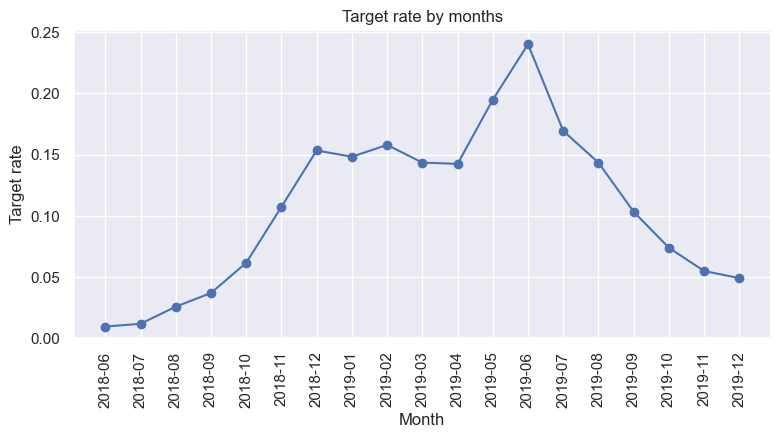

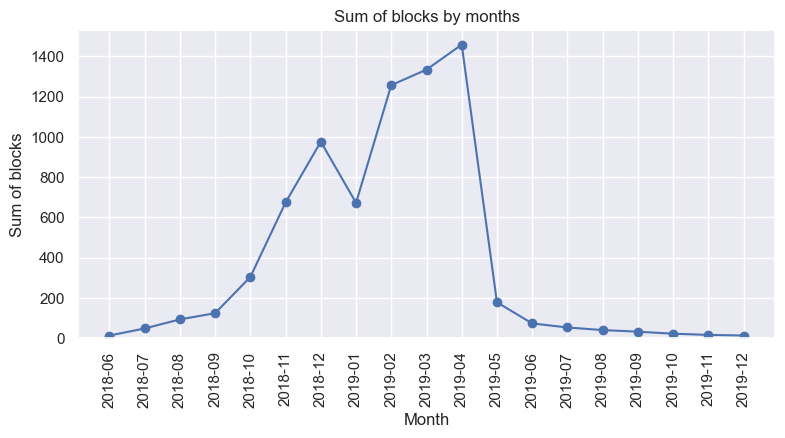

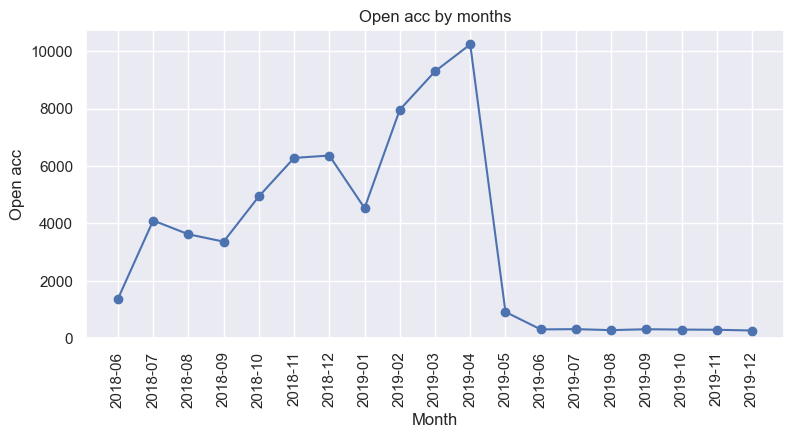

In [7]:
# Отрисовка среднего таргета, сумма таргетов и количество наблюдений по месяцам

a = df.groupby('year_mon_open',as_index=False)['target'].mean()
rotation = 90
plt.figure(figsize=(9,4))
a['target'].plot(marker='o')
plt.xticks(range(len(a)), a.year_mon_open, rotation=rotation);
plt.ylim(0)
plt.xlabel('Month')
plt.ylabel('Target rate')
plt.title('Target rate by months')
'';
a = df.groupby('year_mon_open',as_index=False)['target'].sum()
rotation = 90
plt.figure(figsize=(9,4))
a['target'].plot(marker='o')
plt.xticks(range(len(a)), a.year_mon_open, rotation=rotation);
plt.ylim(0)
plt.xlabel('Month')
plt.ylabel('Sum of blocks')
plt.title('Sum of blocks by months')
;
a = df.groupby('year_mon_open',as_index=False)['target'].count()
rotation = 90
plt.figure(figsize=(9,4))
a['target'].plot(marker='o')
plt.xticks(range(len(a)), a.year_mon_open, rotation=rotation);
plt.ylim(0)
plt.xlabel('Month')
plt.ylabel('Open acc')
plt.title('Open acc by months')
plt.show()

In [8]:
# Определение признаков для дальнейшего анализа

features = dict_features['features']
print(len(features))
print()
cont_features = dict_features['cont_features']
print(len(cont_features))
print()
cat_features = dict_features['cat_features']
print(len(cat_features))

target_col = 'target'

40

16

24


In [11]:
# Удаление признаков, в которых может быть потенциальный лик

drop_lik =['diff_req_open',
           'more_one_close_m', 
           'more_one_close_q', 
           'more_one_open', 
           'more_one_open_m', 
           'more_one_open_q', 
#           'more_one_req', 
           'more_one_req_m', 
           'more_one_req_q'
          ]

features = list(set(features)-set(drop_lik))
print(len(features))
print()
cont_features = list(set(cont_features)-set(drop_lik))
print(len(cont_features))
print()
cat_features = list(set(cat_features)-set(drop_lik))
print(len(cat_features))

33

15

18


In [12]:
cont_features,cat_features

(['kolichestvo_change_rukovoditelja',
  '_kolichestvo_kompanij_s_analogichnym_direktorom',
  'kolichestvo_vidov_dejatel_nosti_u_klienta',
  'ros',
  '_kolichestvo_kompanij_s_analogichnym_direktorom_v_tom_zhe_regione',
  'passivy_vsego',
  'roa',
  'summa_naloga',
  'razmer_ustavnogo_kapital_jul',
  'kolichestvo_kompanij_zaregistrirovannyh_na_adrese_registratsii_organizatsii_po_dannym_sajta_fns',
  'kolichestvo_souchreditelej',
  'tax_profit',
  'chistaja_pribyl_ili_ubytok_kompanii',
  'kolichestvo_filialov',
  'vyruchka_kompanii_mln_rub_'],
 ['_massovyj_kontaktnyj_telefon_v_zajavke_ukazan_telefon_na_kotoryj_zaregistrirovano_bolee_h_kompanij_krome_kompanij_agentov_',
  'indeks_dolzhnoj_osmotritel_nosti',
  'otchetnyj_period_god_',
  'sub_ekt_mestonahozhdenija',
  'chislennost_kompanii',
  'opf_organizatsii',
  'kredity',
  'data_registratsii',
  '_organizatsija_pervoe_litso_uchrediteli_vhodit_v_spisok_diskvalifitsirovannyh_',
  'indeks_finansovogo_riska',
  'more_one_close',
  'kmeans_2

##### Подготовка данных к обучению

In [7]:
# Приведение всех количественных признаков к float; категориальных признаков к category
# Обозначение обучающего и тестового множества, таргетов. Сбрасывание индексов для формирования фолдов

df_train[cont_features] = df_train[cont_features].astype(float)
df_train[cat_features] = df_train[cat_features].astype('category')

X_train = df_train[features]
X_test = df_test[features]

y_train = df_train[target_col]
y_test = df_test[target_col]

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

print(X_train.shape,len(y_train),X_test.shape,len(y_test))

(52049, 33) 52049 (13012, 33) 13012


razmer_ustavnogo_kapital_jul


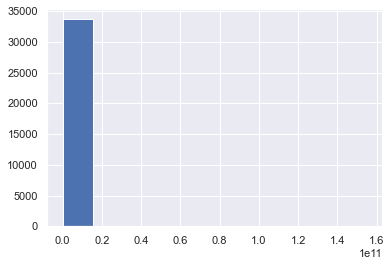

kolichestvo_filialov


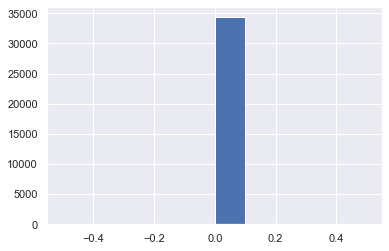

_kolichestvo_kompanij_s_analogichnym_direktorom_v_tom_zhe_regione


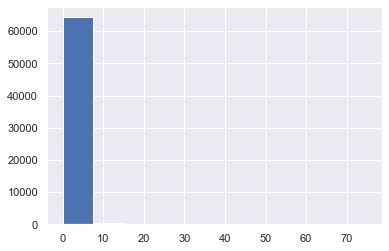

kolichestvo_change_rukovoditelja


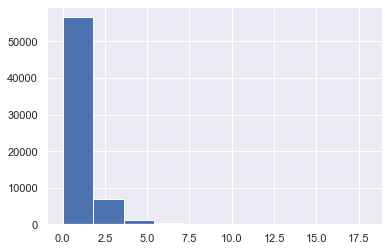

chistaja_pribyl_ili_ubytok_kompanii


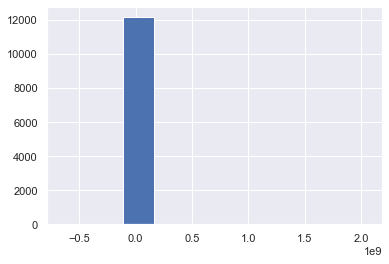

summa_naloga


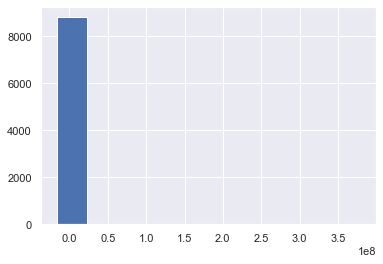

kolichestvo_kompanij_zaregistrirovannyh_na_adrese_registratsii_organizatsii_po_dannym_sajta_fns


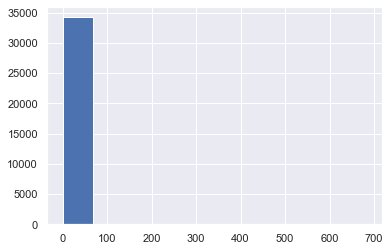

vyruchka_kompanii_mln_rub_


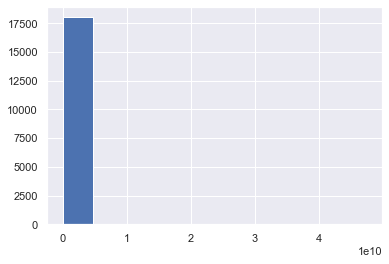

roa


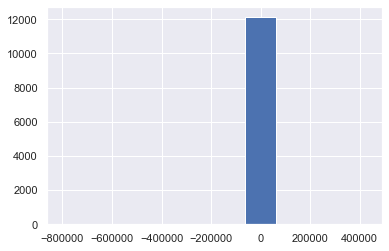

passivy_vsego


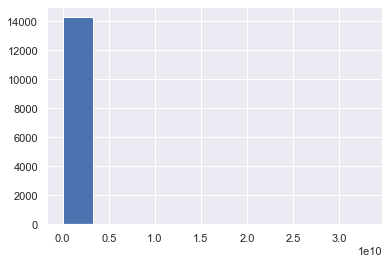

kolichestvo_vidov_dejatel_nosti_u_klienta


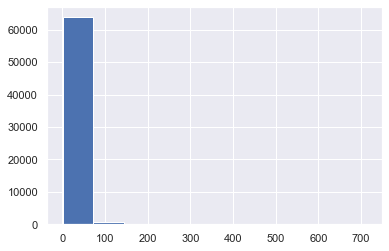

tax_profit


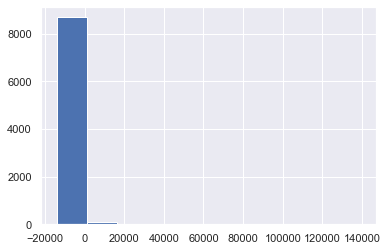

_kolichestvo_kompanij_s_analogichnym_direktorom


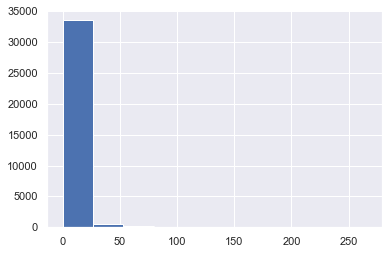

kolichestvo_souchreditelej


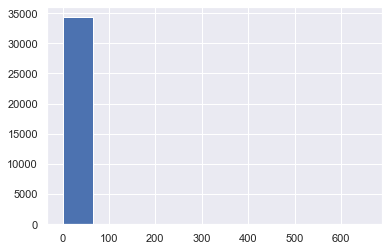

ros


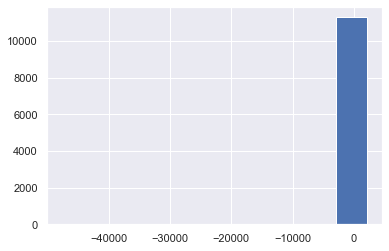

In [8]:
# Отрисовка распределений численных признаков

for feat in cont_features:
    print(feat)
    df[feat].hist()
    plt.show()

In [9]:
# Описание численных признаков

df[cont_features].describe()

,razmer_ustavnogo_kapital_jul,kolichestvo_filialov,_kolichestvo_kompanij_s_analogichnym_direktorom_v_tom_zhe_regione,kolichestvo_change_rukovoditelja,chistaja_pribyl_ili_ubytok_kompanii,summa_naloga,kolichestvo_kompanij_zaregistrirovannyh_na_adrese_registratsii_organizatsii_po_dannym_sajta_fns,vyruchka_kompanii_mln_rub_,roa,passivy_vsego,kolichestvo_vidov_dejatel_nosti_u_klienta,tax_profit,_kolichestvo_kompanij_s_analogichnym_direktorom,kolichestvo_souchreditelej,ros
count,3.367800e+04,34332.0,64738.000000,65061.000000,1.218400e+04,8.831000e+03,34332.000000,1.802400e+04,12123.000000,1.428800e+04,64843.000000,8786.000000,34332.000000,34332.000000,11303.000000
mean,5.691999e+06,0.0,0.931493,0.746638,2.632184e+06,7.768289e+05,2.831673,4.646758e+07,-63.489144,4.279192e+07,15.388060,88.505031,4.193755,1.328498,-14.958686
std,8.481468e+08,0.0,1.781806,0.980392,2.793011e+07,6.130581e+06,11.558671,4.376313e+08,8522.249677,3.466155e+08,19.561734,1675.750235,10.246368,3.649858,690.740568
min,1.000000e+04,0.0,0.000000,0.000000,-6.473920e+08,-1.689252e+07,0.000000,0.000000e+00,-799771.962617,-1.234200e+05,1.000000,-14182.524272,0.000000,0.000000,-47517.990000
25%,1.000000e+04,0.0,0.000000,0.000000,7.965000e+03,2.520000e+04,1.000000,0.000000e+00,0.181857,4.850250e+05,4.000000,10.844545,1.000000,1.000000,0.182392
50%,1.000000e+04,0.0,1.000000,1.000000,2.153100e+05,1.086400e+05,1.000000,2.200000e+06,4.121734,4.645200e+06,10.000000,23.322022,2.000000,1.000000,1.869463
75%,3.000000e+04,0.0,1.000000,1.000000,1.542930e+06,4.191900e+05,2.000000,2.250000e+07,19.165970,2.358368e+07,20.000000,30.354084,3.000000,1.000000,7.925301
max,1.551000e+11,0.0,75.000000,18.000000,2.051410e+09,3.800754e+08,684.000000,4.743280e+10,429797.979798,3.302406e+10,714.000000,139479.207921,266.000000,656.000000,2094.987500


# Обучаем базовую модель и удалим фичи с gain = 0

In [10]:
# Приведение категориальных признаков к формату "категория" и заполнение пропусков с суффиксом для работы с Catboost'ом

for i in cat_features:
    X_train[i] = (X_train[i].astype('str').fillna('nan')+'_cat').astype('category')
    X_test[i] = (X_test[i].astype('str').fillna('nan')+'_cat').astype('category')

In [11]:
# Нужный тип для Catboost

train_data_cb = Pool(X_train,
                     y_train,
                     cat_features=cat_features)

# Базовые параметры
base_params = {'learning_rate':0.1,
               'iterations':500,
               'loss_function':'Logloss',
               'random_state': 42,
               'verbose':100}

# Обучение
base_model_cb = CatBoostClassifier(**base_params)
base_model_cb.fit(train_data_cb)

# Смотрим importance по gain
importance = pd.Series(base_model_cb.get_feature_importance(), 
                       index=X_train.columns.tolist()).sort_values(ascending=False)

to_drop = importance[importance == 0].index.tolist()
print('Количество неинформативных признаков по gain: ', len(to_drop), '\n','\n',to_drop)

0:	learn: 0.6113408	total: 187ms	remaining: 1m 33s
100:	learn: 0.2894514	total: 11.8s	remaining: 46.7s
200:	learn: 0.2809023	total: 26.2s	remaining: 38.9s
300:	learn: 0.2753516	total: 41.1s	remaining: 27.2s
400:	learn: 0.2701124	total: 54.7s	remaining: 13.5s
499:	learn: 0.2655537	total: 1m 7s	remaining: 0us
Количество неинформативных признаков по gain:  2 
 
 ['_v_uchrediteljah_uchastnikah_aktsionerah_klienta_uchastie_gosudarstva_bolee_', 'kmeans_2']


In [22]:
# Обновление признаков после удаления с gain = 0

features_after_gain = list(set(features) - set(to_drop))
cont_after_gain = list(set(cont_features) - set(to_drop))
cat_after_gain = list(set(cat_features) - set(to_drop))

print(len(features_after_gain),len(cont_after_gain),len(cat_after_gain))

31 15 16


In [13]:
# Отсортированный список признаков после отбора по gain!=0

sorted(features_after_gain)

['_kolichestvo_kompanij_s_analogichnym_direktorom',
 '_kolichestvo_kompanij_s_analogichnym_direktorom_v_tom_zhe_regione',
 '_massovyj_kontaktnyj_telefon_v_zajavke_ukazan_telefon_na_kotoryj_zaregistrirovano_bolee_h_kompanij_krome_kompanij_agentov_',
 '_organizatsija_pervoe_litso_uchrediteli_vhodit_v_spisok_diskvalifitsirovannyh_',
 'chislennost_kompanii',
 'chistaja_pribyl_ili_ubytok_kompanii',
 'data_registratsii',
 'indeks_dolzhnoj_osmotritel_nosti',
 'indeks_finansovogo_riska',
 'kmeans_10',
 'kmeans_5',
 'kmeans_9',
 'kod_osnovnogo_okved',
 'kolichestvo_change_rukovoditelja',
 'kolichestvo_filialov',
 'kolichestvo_kompanij_zaregistrirovannyh_na_adrese_registratsii_organizatsii_po_dannym_sajta_fns',
 'kolichestvo_souchreditelej',
 'kolichestvo_vidov_dejatel_nosti_u_klienta',
 'kompanija_vhodit_v_juridicheskie_litsa_v_sostav_ispolnitel_nyh_organov_kotoryh_vhodjat_diskvalifitsirovannye_litsa',
 'kredity',
 'more_one_close',
 'opf_organizatsii',
 'otchetnyj_period_god_',
 'passivy_vsego',
 'razmer_ustavnogo_kapital_jul',
 'roa',
 'ros',
 'sub_ekt_mestonahozhdenija',
 'summa_naloga',
 'tax_profit',
 'vyruchka_kompanii_mln_rub_']

# Tune parameters

In [23]:
# Обновление обучающего и тестового множеств

X_train_gain = X_train[features_after_gain]
X_test_gain = X_test[features_after_gain]

# Приведение обучающего множества к необходимому формату

train_data = Pool(X_train_gain,
                  y_train,
                  cat_features=cat_after_gain)

In [16]:
# Необходимая метрика. В текущей разработке, модель является поведенческой, разметка является точной,
# target rate имеет высокое значение, поэтому оптимизационной метрикой при кросс-валидационной схеме обучения выбран ROC AUC

def AUC_ctb(ytrue,ypred):
    
    # Формируем датасет
    df = pd.DataFrame({'target': ytrue, 'prediction': ypred})
    auc_ctb = roc_auc_score(df.target, df.prediction)
    return auc_ctb

In [15]:
# Пространство признаков и сетки перебора, определение целочисленных параметров, добавление eval метрики

space = {'eval_metric':'AUC',
         'loss_function': 'Logloss',
         'iterations': hp.quniform('iterations', 100, 5000, 50),
         'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.2)),
         'reg_lambda': hp.uniform('reg_lambda', 1, 5),
         'subsample': hp.uniform('subsample', 0.5, 1),
         'max_depth': hp.quniform('max_depth', 4, 11, 1),
         'grow_policy': 'SymmetricTree', #hp.choice('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
         'bootstrap_type': hp.choice('bootstrap_type', ['MVS', 'Bernoulli']),
         'rsm': hp.uniform('rsm', 0.5, 1),
         'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 10),
         'random_state': 42,
         'verbose': 0
        }

int_params = ['max_depth',
             'iterations']

params = base_params.copy()
params['eval_metric'] = 'AUC'

In [18]:
# Фолды для кросс-обучения

folds = list(StratifiedGroupKFold(n_splits=4,shuffle=True,random_state=42).\
             split(df_train,df_train.target,groups=df_train.inn))

In [17]:
# Подбор гиперпараметров на фолдах с помощью библиотеки hyperopt

best = my_tune_params(X_train_gain,
               y_train,
               space,
               params,
               int_params,
               folds,
               early_stopping_rounds=100,
               categorical_feature=cat_after_gain,
               metric=AUC_ctb,
               hyperopt_iters=500)

0:	test: 0.6198111	test1: 0.6268306	best: 0.6268306 (0)	total: 91.5ms	remaining: 45.7s
100:	test: 0.8535726	test1: 0.7903576	best: 0.7903576 (100)	total: 8.47s	remaining: 33.5s
200:	test: 0.8975206	test1: 0.7930228	best: 0.7931418 (192)	total: 18.2s	remaining: 27.1s
300:	test: 0.9034752	test1: 0.7936632	best: 0.7936950 (298)	total: 27.7s	remaining: 18.3s
400:	test: 0.9098451	test1: 0.7941870	best: 0.7946619 (376)	total: 37.9s	remaining: 9.35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7946619496
bestIteration = 376

Shrink model to first 377 iterations.
0:	test: 0.6292246	test1: 0.6385609	best: 0.6385609 (0)	total: 103ms	remaining: 51.5s
100:	test: 0.8635350	test1: 0.7927622	best: 0.7927622 (100)	total: 8.92s	remaining: 35.2s
200:	test: 0.8773730	test1: 0.7952235	best: 0.7952845 (199)	total: 18.5s	remaining: 27.5s
300:	test: 0.8910284	test1: 0.7959598	best: 0.7962554 (241)	total: 28.5s	remaining: 18.8s
400:	test: 0.9089535	test1: 0.7965950	best: 0.7966184 (348

In [18]:
#with open('best_params.yaml', 'r') as f:
#    best = yaml.load(f)

best

{'bootstrap_type': 'Bernoulli',
 'eval_metric': 'AUC',
 'grow_policy': 'SymmetricTree',
 'iterations': 1150.0,
 'learning_rate': 0.004856338608446073,
 'loss_function': 'Logloss',
 'max_depth': 7.0,
 'random_state': 42,
 'reg_lambda': 2.2777890041590694,
 'rsm': 0.5345256704368021,
 'scale_pos_weight': 8.493688290834637,
 'subsample': 0.7273505261106861,
 'verbose': 0}

In [14]:
# Оптимальные гиперпараметры

best_params = {'bootstrap_type': 'Bernoulli',
 'eval_metric': 'AUC',
 'grow_policy': 'SymmetricTree',
 'iterations': 1150,
 'learning_rate': 0.004856338608446073,
 'loss_function': 'Logloss',
 'max_depth': 7,
 'random_state': 42,
 'reg_lambda': 2.2777890041590694,
 'rsm': 0.5345256704368021,
 'scale_pos_weight': 8.493688290834637,
 'subsample': 0.7273505261106861,
 'verbose': 0}

In [19]:
# Параметры для кросс обучения

cross_params = dict()

cross_params['nround'] = 1500
cross_params['early_stopping_rounds'] = 100
cross_params['metric'] = AUC_ctb # Метрика для оценки качества, на вход принимает y_true, y_pred
cross_params['folds'] = folds # Разбиение на фолды - список кортежей вида: (train_fold_index, test_fold_index)
cross_params['higher_is_better'] = True # Направленность метрики. Например: mae - False, auc - True
cross_params['categorical_feature'] = cat_after_gain
cross_params['seed'] = 42

In [24]:
%%time

# Обучение модели по кросс-валидационной схеме на 4-х фолдах

ctb_cv = CTB_cv(best_params,cross_params)

ctb_cv.fit(X_train_gain,y_train,X_test_gain,'ctb')

0:	test: 0.7657666	test1: 0.7522040	best: 0.7522040 (0)	total: 143ms	remaining: 3m 33s
500:	test: 0.8204997	test1: 0.7852478	best: 0.7852478 (500)	total: 1m	remaining: 2m
1000:	test: 0.8339298	test1: 0.7894330	best: 0.7894330 (1000)	total: 1m 56s	remaining: 58s
1499:	test: 0.8427944	test1: 0.7912898	best: 0.7912898 (1499)	total: 2m 48s	remaining: 0us

bestTest = 0.7912898143
bestIteration = 1499

Fold 0: 0.79129
0:	test: 0.7454418	test1: 0.7357677	best: 0.7357677 (0)	total: 136ms	remaining: 3m 23s
500:	test: 0.8168908	test1: 0.7857630	best: 0.7857630 (500)	total: 1m 4s	remaining: 2m 9s
1000:	test: 0.8272436	test1: 0.7907074	best: 0.7907186 (997)	total: 2m 4s	remaining: 1m 1s
1499:	test: 0.8347473	test1: 0.7929498	best: 0.7929528 (1498)	total: 3m 4s	remaining: 0us

bestTest = 0.7929527962
bestIteration = 1498

Shrink model to first 1499 iterations.
Fold 1: 0.79295
0:	test: 0.7674977	test1: 0.7343394	best: 0.7343394 (0)	total: 135ms	remaining: 3m 21s
500:	test: 0.8179385	test1: 0.7767910

In [25]:
# Обозначаем модель, метрику для расчета и название метрики

model = ctb_cv.model
name_metric = 'ROC AUC'
calc_metric = AUC_ctb

In [26]:
# Обозначим скорр на train и test

pred_train = model.predict(X_train_gain)
pred_test = model.predict(X_test_gain)

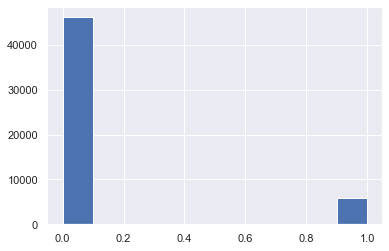

In [29]:
plt.hist(y_train)
plt.show()

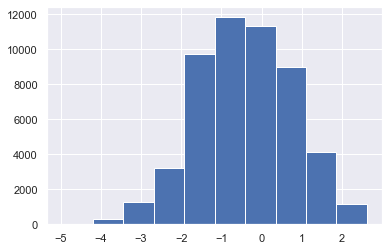

In [28]:
plt.hist(pred_train)
plt.show()

Количество единиц в train:  5880
Количество единиц в test:  1500
Общее количество единиц (train и test):  7380

Количество строк в train:  52049
Количество строк в test:  13012
Общее количество строк (train и test):  65061

Размер train %:  80
Размер test %:  19

Threshold by f1:  0.7730630630630632

TRAIN
Recall@15614: 0.7671768707482993
AP:  0.4094219062045021
MCC:  0.37010708219552474
F1:  0.4469296740994854
ROC-AUC:  0.8383490343006315
GINI:  0.6766980686012629
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     46169
           1       0.37      0.55      0.45      5880

    accuracy                           0.85     52049
   macro avg       0.66      0.72      0.68     52049
weighted avg       0.88      0.85      0.86     52049

TEST
Recall@3903: 0.704
AP:  0.3613226772311049
MCC:  0.32721389435355785
F1:  0.4125068568294021
ROC-AUC:  0.8023828758397036
GINI:  0.6047657516794072
              precision    recall  f1-score   supp

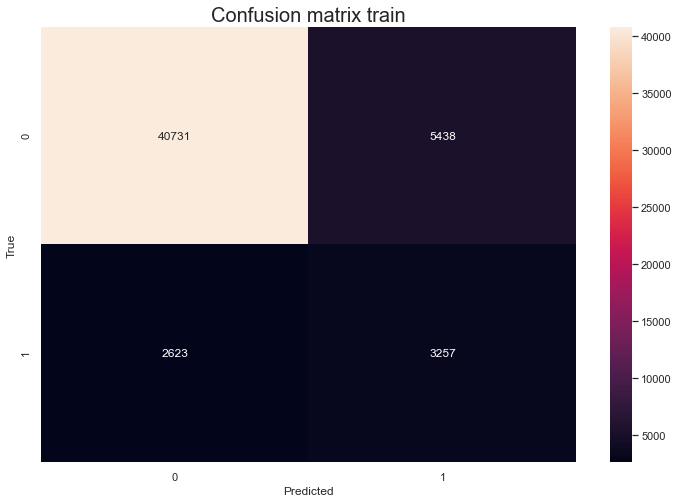

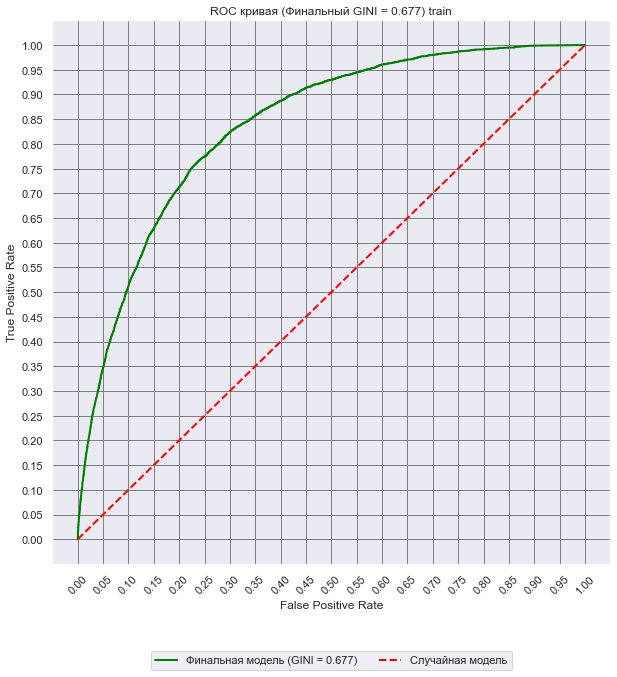

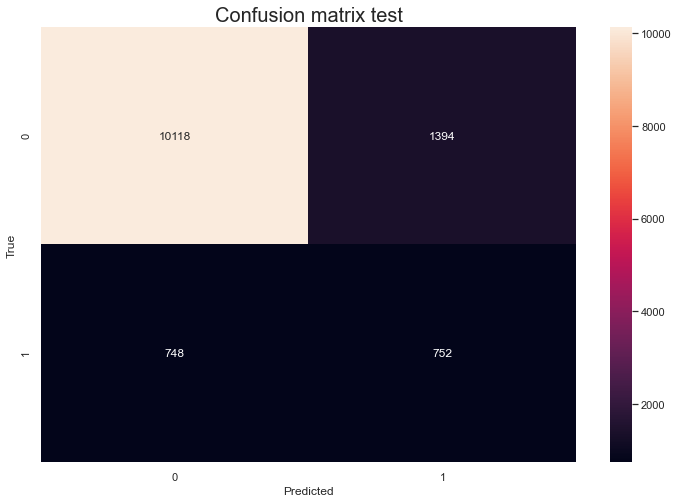

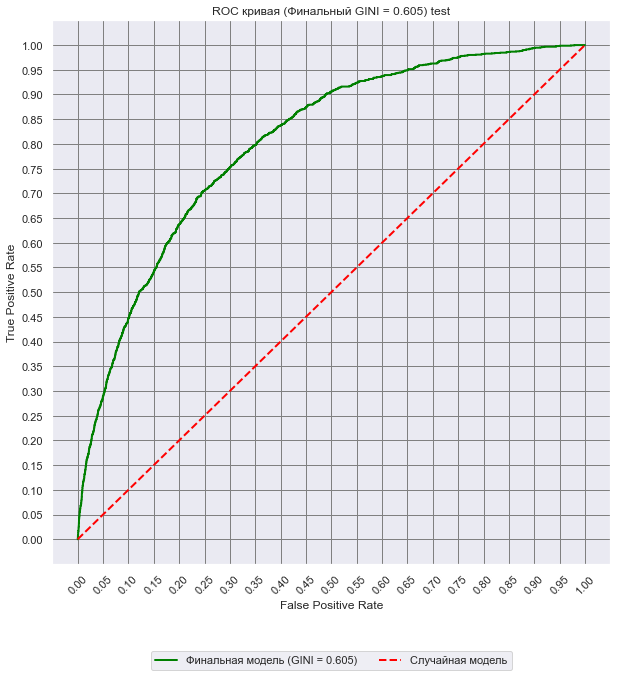

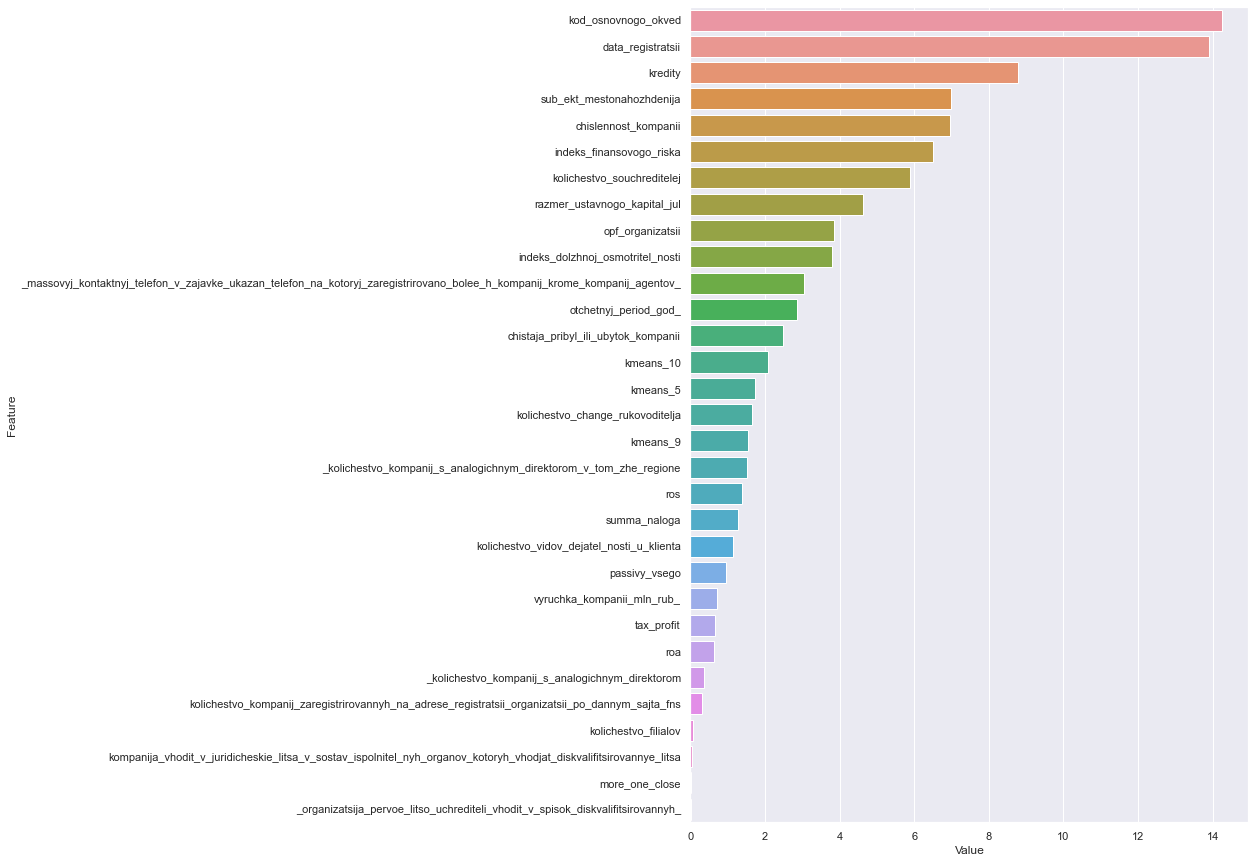

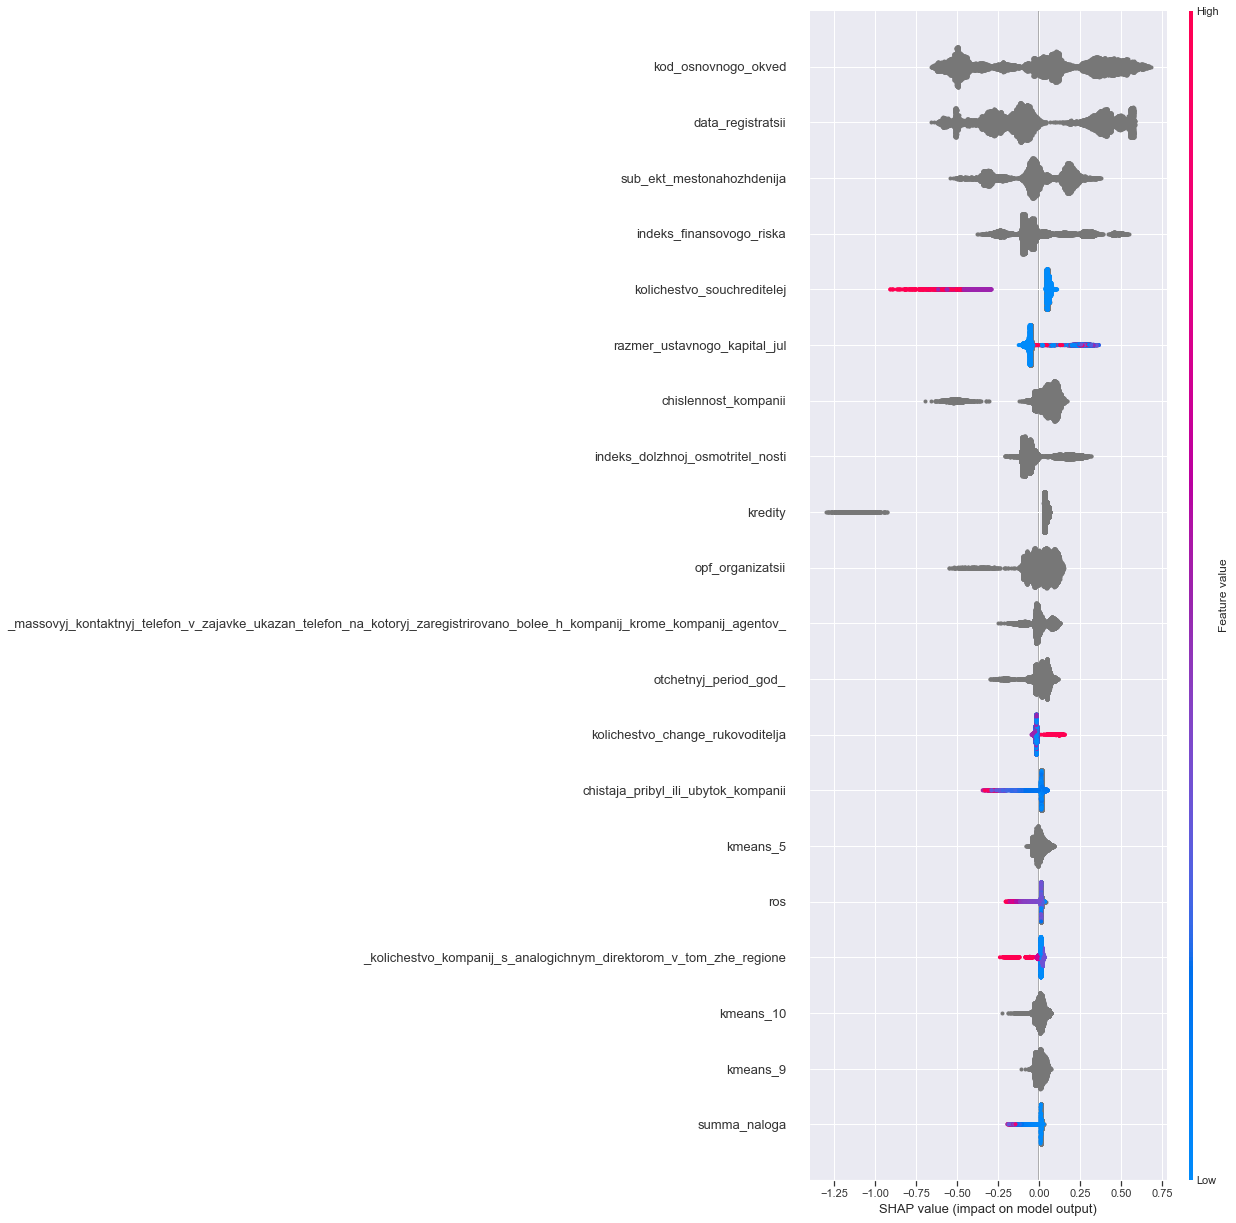

CPU times: user 40.4 s, sys: 630 ms, total: 41 s
Wall time: 18 s


In [24]:
%%time

# Расчитываем метрики для всех множеств, отрисовываем матрицы ошибок, графики метрики ROC AUC и важность признаков

answer_train = pd.DataFrame()
answer_test = pd.DataFrame()

answer_train['TRUE'] = y_train
answer_train['PREDICTED'] = pred_train

answer_test['TRUE'] = y_test
answer_test['PREDICTED'] = pred_test

show_metrics(answer_train, answer_test, ctb_cv.model, X_test_gain, 0.3)

In [25]:
# Cчитаем метрику

print(name_metric+' Train: ', calc_metric(y_train,pred_train))
print(name_metric+' Mean of folds: ', calc_metric(y_train,ctb_cv.cvpred))
print(name_metric+' Test:', calc_metric(y_test,pred_test))

ROC AUC Train:  0.8383490343006315
ROC AUC Mean of folds:  0.7891929115643311
ROC AUC Test: 0.8023828758397036


In [26]:
# Импорт алгоритма Permutation Importance из библиотеки sklearn, для разсчета важности признаков со случайным
# перемешиванием фактора

%%time
from sklearn.inspection import permutation_importance

sk_result_tr = permutation_importance(ctb_cv, X_train_gain, y_train, n_repeats=5, random_state=0)
sk_result_te = permutation_importance(ctb_cv, X_test_gain, y_test, n_repeats=5, random_state=0)

CPU times: user 7min 1s, sys: 11.4 s, total: 7min 12s
Wall time: 2min 27s


In [27]:
# sklearn permutation importance


sorted_idx = sk_result_tr.importances_mean.argsort()
tr_permute = pd.DataFrame({'Feature_name':np.array(ctb_cv.feature_names)[sorted_idx],
              'Mean_Permutation_train':sk_result_tr.importances_mean[sorted_idx]})

te_permute = pd.DataFrame({'Feature_name':np.array(ctb_cv.feature_names)[sorted_idx],
              'Mean_Permutation_test':sk_result_te.importances_mean[sorted_idx]})
sk_mean_permute = tr_permute.merge(te_permute,how='left',on='Feature_name').\
sort_values(by='Mean_Permutation_train',ascending=False)

sk_mean_permute['Difference (abs)'] = abs(sk_mean_permute.Mean_Permutation_train-sk_mean_permute.Mean_Permutation_test)

Text(0.5, 0, 'Sklearn Permutation Importance')

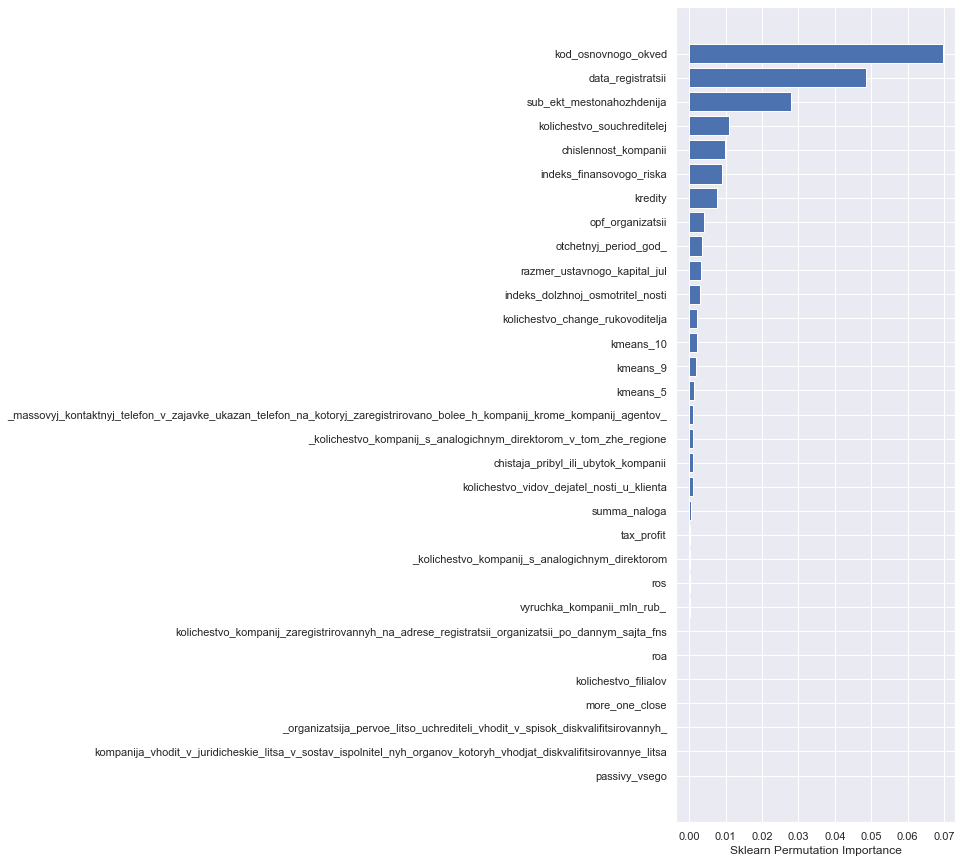

In [28]:
# Отрисовка признаков по Sklearn permutation importance

plt.figure(figsize=(5, 15))
plt.barh(np.array(ctb_cv.feature_names)[sorted_idx], sk_result_tr.importances_mean[sorted_idx])
plt.xlabel("Sklearn Permutation Importance")

In [29]:
# Импорт алгоритма Permutation Importance из библиотеки Eli5, для разсчета важности признаков со случайным
# перемешиванием фактора

%%time
from eli5.permutation_importance import get_score_importances

base_score_tr, eli_result_tr = get_score_importances(ctb_cv.score, X_train_gain.values, y_train, n_iter=5, random_state=0)
base_score_te, eli_result_te = get_score_importances(ctb_cv.score, X_test_gain.values, y_test, n_iter=5,random_state=0)

CPU times: user 7min 58s, sys: 10.7 s, total: 8min 9s
Wall time: 2min 47s


In [30]:
tr_permute = pd.DataFrame({'Feature_name':ctb_cv.feature_names,
             'Mean_Permutation_train':np.mean(eli_result_tr, axis=0)})

te_permute = pd.DataFrame({'Feature_name':ctb_cv.feature_names,
             'Mean_Permutation_test':np.mean(eli_result_te, axis=0)})

eli_mean_permute = tr_permute.merge(te_permute,how='left',on='Feature_name').\
sort_values(by='Mean_Permutation_train',ascending=False)

eli_mean_permute['Difference (abs)'] = abs(eli_mean_permute.Mean_Permutation_train-eli_mean_permute.Mean_Permutation_test)

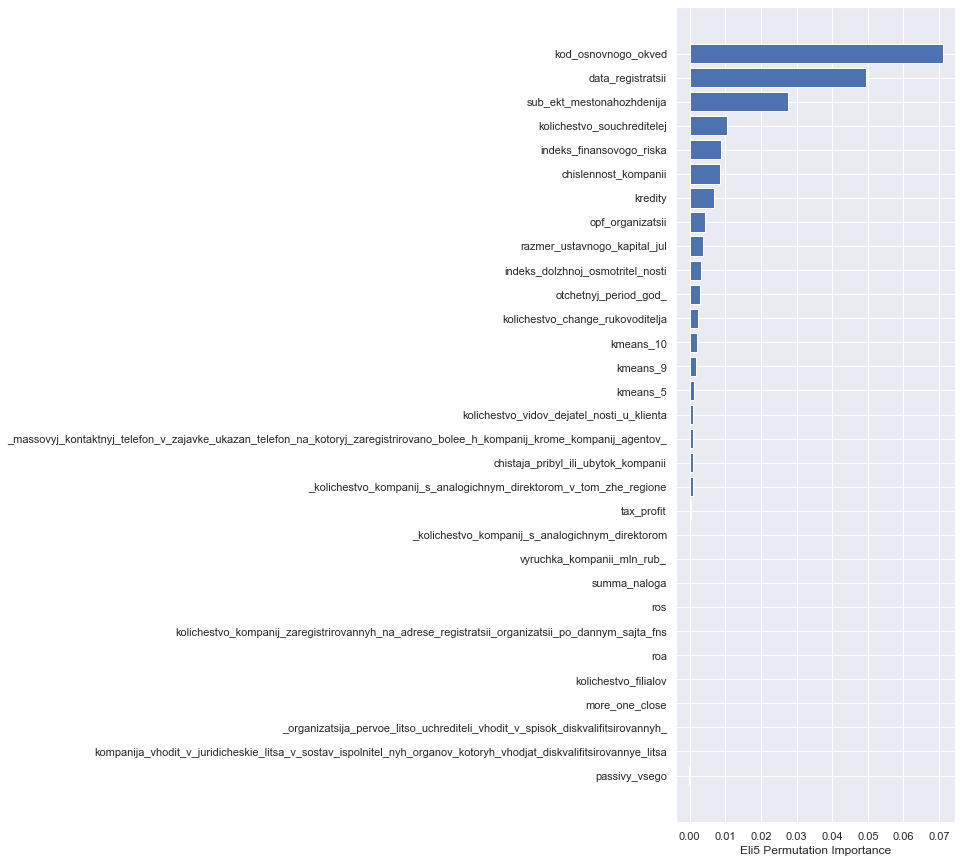

In [31]:
# Отрисовка признаков по Sklearn permutation importance

plt.figure(figsize=(5, 15))
plt.barh(np.array(eli_mean_permute.Feature_name[::-1]), eli_mean_permute.Mean_Permutation_train[::-1])
plt.xlabel("Eli5 Permutation Importance")
plt.show()

In [32]:
# Результаты отбора признаков при условии Permutation Importance > 0

sk_perm_features = sk_mean_permute[sk_mean_permute.Mean_Permutation_train>0].Feature_name.tolist()
print('Cnt sklearn permute >0: ', len(sk_perm_features))
eli_perm_features = eli_mean_permute[eli_mean_permute.Mean_Permutation_train>0].Feature_name.tolist()
print('Eli sklearn permute >0: ', len(eli_perm_features))

Cnt sklearn permute >0:  30
Eli sklearn permute >0:  29


In [33]:
# Функция для вызова атрибута all_imp, содержащего значимость факторов на основе разных методов
# Принимает на вход один параметр: sort для определения колонки для сортировки
# По умолчанию сортировка по Importance
# Важность берется средней по фолдам

def get_importances(model, sort='importance'):
    return model.all_imp.sort_values(by=sort, ascending=False)


importance_features = get_importances(ctb_cv, sort='importance')

imp_features = list(importance_features[importance_features['importance']!=0].index)
len(imp_features)

31

In [34]:
# Проверка признаков, относительно графиков Permutation Importance для дальнейшего жадного отбора
# с помощью алгоритмов Forward и Bacward Selection

eli_perm_features[:20]

['kod_osnovnogo_okved',
 'data_registratsii',
 'sub_ekt_mestonahozhdenija',
 'kolichestvo_souchreditelej',
 'indeks_finansovogo_riska',
 'chislennost_kompanii',
 'kredity',
 'opf_organizatsii',
 'razmer_ustavnogo_kapital_jul',
 'indeks_dolzhnoj_osmotritel_nosti',
 'otchetnyj_period_god_',
 'kolichestvo_change_rukovoditelja',
 'kmeans_10',
 'kmeans_9',
 'kmeans_5',
 'kolichestvo_vidov_dejatel_nosti_u_klienta',
 '_massovyj_kontaktnyj_telefon_v_zajavke_ukazan_telefon_na_kotoryj_zaregistrirovano_bolee_h_kompanij_krome_kompanij_agentov_',
 'chistaja_pribyl_ili_ubytok_kompanii',
 '_kolichestvo_kompanij_s_analogichnym_direktorom_v_tom_zhe_regione',
 'tax_profit']

In [35]:
%%time
# На вход подается: (Модель, признаки, трейн датасет,таргет,доля фолдов 
# которые должны улучшиться,количество итераций до остановки, тип значимости)
## На выходе возвращаются список отобранных факторов

f_features = forward_selection(ctb_cv,eli_perm_features[:20], X_train_gain,y_train, q=0.1, tol=5)

Feature kod_osnovnogo_okved has been added -> current score: 0.6763677456476487
Score has improved on 4 folds

Feature data_registratsii has been added -> current score: 0.7329236165292408
Score has improved on 4 folds

Feature sub_ekt_mestonahozhdenija has been added -> current score: 0.7482657684636549
Score has improved on 4 folds

Feature kolichestvo_souchreditelej has been added -> current score: 0.7670984855320652
Score has improved on 4 folds

Feature indeks_finansovogo_riska has been added -> current score: 0.777656895672864
Score has improved on 4 folds

Feature chislennost_kompanii has been added -> current score: 0.7805801294812064
Score has improved on 4 folds

Feature kredity has been added -> current score: 0.78245351195318
Score has improved on 4 folds

Feature opf_organizatsii has been added -> current score: 0.7834764626605328
Score has improved on 4 folds

Feature razmer_ustavnogo_kapital_jul has been added -> current score: 0.7865145525188558
Score has improved on 4 

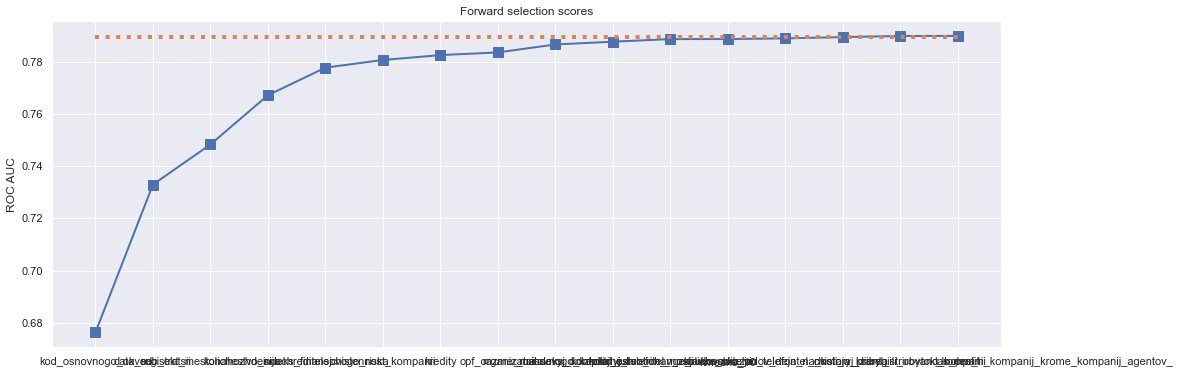

In [36]:
# Отрисовка признаков по алгоритму Forward Selection
plot_forward(ctb_cv, name_metric)

In [37]:
# Список полученных признаков Forward

f_features

['kod_osnovnogo_okved',
 'data_registratsii',
 'sub_ekt_mestonahozhdenija',
 'kolichestvo_souchreditelej',
 'indeks_finansovogo_riska',
 'chislennost_kompanii',
 'kredity',
 'opf_organizatsii',
 'razmer_ustavnogo_kapital_jul',
 'indeks_dolzhnoj_osmotritel_nosti',
 'kolichestvo_change_rukovoditelja',
 'kmeans_10',
 'kolichestvo_vidov_dejatel_nosti_u_klienta',
 '_massovyj_kontaktnyj_telefon_v_zajavke_ukazan_telefon_na_kotoryj_zaregistrirovano_bolee_h_kompanij_krome_kompanij_agentov_',
 'chistaja_pribyl_ili_ubytok_kompanii',
 'tax_profit']

In [38]:
# Аналогично forward selection обратным удалением признаков

b_features = backward_selection(ctb_cv,eli_perm_features[:20],X_train_gain,y_train,tol=5)

In [39]:
# Список полученных признаков Backward

b_features

['kolichestvo_change_rukovoditelja',
 'kod_osnovnogo_okved',
 'razmer_ustavnogo_kapital_jul',
 'opf_organizatsii',
 'kmeans_9',
 'kmeans_10',
 'kredity',
 'indeks_finansovogo_riska',
 'chistaja_pribyl_ili_ubytok_kompanii',
 '_kolichestvo_kompanij_s_analogichnym_direktorom_v_tom_zhe_regione',
 'indeks_dolzhnoj_osmotritel_nosti',
 'tax_profit',
 'chislennost_kompanii',
 'kmeans_5',
 '_massovyj_kontaktnyj_telefon_v_zajavke_ukazan_telefon_na_kotoryj_zaregistrirovano_bolee_h_kompanij_krome_kompanij_agentov_',
 'kolichestvo_souchreditelej',
 'otchetnyj_period_god_',
 'sub_ekt_mestonahozhdenija',
 'kolichestvo_vidov_dejatel_nosti_u_klienta',
 'data_registratsii']

In [40]:
print('Количество факторов при разработке: ', len(features_after_gain))
print('Количество факторов по Feature importance: ', len(imp_features))
print('Количество факторов по Forward selection: ',len(f_features))
print('Количество факторов по Backward selection: ',len(b_features))

Количество факторов при разработке:  31
Количество факторов по Feature importance:  31
Количество факторов по Forward selection:  16
Количество факторов по Backward selection:  20


In [41]:
# Сохранение всех признаков в текущей разработке модели

collection_of_features = {'features_after_gain':features_after_gain,
                         'features_after_cv':imp_features,
                         'features_after_sk_permut':sk_perm_features,
                         'features_after_eli_permut':eli_perm_features,
                         'features_after_forward':f_features,
                         'features_after_backward':b_features}

with open('collection_features.yaml', 'w') as f:
    yaml.dump(collection_of_features, f)

In [42]:
# Обучение модели на признаках Forward

f_cat = list(filter(lambda x: x in cat_after_gain, f_features))
cross_params['categorical_feature'] = f_cat

X_train_f = X_train[f_features]
X_test_f = X_test[f_features]

ctb_cv_f = CTB_cv(best_params,cross_params)

ctb_cv_f.fit(X_train_f,y_train,X_test_f,'ctb_forward')

0:	test: 0.7739221	test1: 0.7428082	best: 0.7428082 (0)	total: 81.2ms	remaining: 2m 1s
500:	test: 0.8209515	test1: 0.7863437	best: 0.7863448 (499)	total: 30.4s	remaining: 1m
1000:	test: 0.8338141	test1: 0.7902403	best: 0.7902403 (1000)	total: 1m 3s	remaining: 31.7s
1499:	test: 0.8442181	test1: 0.7919399	best: 0.7919399 (1499)	total: 1m 36s	remaining: 0us

bestTest = 0.7919399215
bestIteration = 1499

Fold 0: 0.79194
0:	test: 0.7284419	test1: 0.7247552	best: 0.7247552 (0)	total: 64.4ms	remaining: 1m 36s
500:	test: 0.8187115	test1: 0.7859412	best: 0.7859412 (500)	total: 30.7s	remaining: 1m 1s
1000:	test: 0.8295515	test1: 0.7908381	best: 0.7908406 (997)	total: 1m 4s	remaining: 31.9s
1499:	test: 0.8404195	test1: 0.7928769	best: 0.7928769 (1499)	total: 1m 36s	remaining: 0us

bestTest = 0.7928769274
bestIteration = 1499

Fold 1: 0.79288
0:	test: 0.7318956	test1: 0.7162138	best: 0.7162138 (0)	total: 64.4ms	remaining: 1m 36s
500:	test: 0.8191739	test1: 0.7777208	best: 0.7777208 (500)	total: 30

In [43]:
# Обучение модели на признаках Backward

b_cat = list(filter(lambda x: x in cat_after_gain, b_features))
cross_params['categorical_feature'] = b_cat

X_train_b = X_train[b_features]
X_test_b = X_test[b_features]

ctb_cv_b = CTB_cv(best_params,cross_params)

ctb_cv_b.fit(X_train_b,y_train,X_test_b,'ctb_backward')

0:	test: 0.7677328	test1: 0.7451315	best: 0.7451315 (0)	total: 97.9ms	remaining: 2m 26s
500:	test: 0.8213385	test1: 0.7849894	best: 0.7849894 (500)	total: 40.5s	remaining: 1m 20s
1000:	test: 0.8303226	test1: 0.7893823	best: 0.7893823 (1000)	total: 1m 21s	remaining: 40.7s
1499:	test: 0.8349499	test1: 0.7910895	best: 0.7910895 (1499)	total: 2m 1s	remaining: 0us

bestTest = 0.7910895039
bestIteration = 1499

Fold 0: 0.79109
0:	test: 0.7604384	test1: 0.7397779	best: 0.7397779 (0)	total: 92.6ms	remaining: 2m 18s
500:	test: 0.8184403	test1: 0.7856768	best: 0.7856768 (500)	total: 41.5s	remaining: 1m 22s
1000:	test: 0.8283192	test1: 0.7907266	best: 0.7907266 (1000)	total: 1m 24s	remaining: 41.9s
1499:	test: 0.8348476	test1: 0.7927373	best: 0.7927373 (1499)	total: 2m 5s	remaining: 0us

bestTest = 0.7927373288
bestIteration = 1499

Fold 1: 0.79274
0:	test: 0.7265144	test1: 0.7134057	best: 0.7134057 (0)	total: 74.6ms	remaining: 1m 51s
500:	test: 0.8180750	test1: 0.7764375	best: 0.7764375 (500)	to

In [44]:
# Обозначим скорр на train и test

pred_train_f = ctb_cv_f.model.predict(X_train_f)
pred_test_f = ctb_cv_f.model.predict(X_test_f)

pred_train_b = ctb_cv_b.model.predict(X_train_b)
pred_test_b = ctb_cv_b.model.predict(X_test_b)

# Cчитаем метрику до и после отбора
print('Метрика до отбора')
print(name_metric+' Train: ', calc_metric(y_train,pred_train))
print(name_metric+' Mean of folds: ', calc_metric(y_train,ctb_cv.cvpred))
print(name_metric+' Test:', calc_metric(y_test,pred_test))
print()
print('Метрика после отбора forward')
print(name_metric+' Train: ', calc_metric(y_train,pred_train_f))
print(name_metric+' Mean of folds: ', calc_metric(y_train,ctb_cv_f.cvpred))
print(name_metric+' Test:', calc_metric(y_test,pred_test_f))
print()
print('Метрика после отбора backward')
print(name_metric+' Train: ', calc_metric(y_train,pred_train_b))
print(name_metric+' Mean of folds: ', calc_metric(y_train,ctb_cv_b.cvpred))
print(name_metric+' Test:', calc_metric(y_test,pred_test_b))

Метрика до отбора
ROC AUC Train:  0.8383490343006315
ROC AUC Mean of folds:  0.7891929115643311
ROC AUC Test: 0.8023828758397036

Метрика после отбора forward
ROC AUC Train:  0.8505578219505004
ROC AUC Mean of folds:  0.7896002916967433
ROC AUC Test: 0.8022857308315959

Метрика после отбора backward
ROC AUC Train:  0.8417869453441018
ROC AUC Mean of folds:  0.7892070915740941
ROC AUC Test: 0.8028548181607599


In [45]:
# Сохранение выбранной модели для дальнейшего применения

pickle.dump(ctb_cv_b, open('final_model.pkl', "wb"))

Количество единиц в train:  5880
Количество единиц в test:  1500
Общее количество единиц (train и test):  7380

Количество строк в train:  52049
Количество строк в test:  13012
Общее количество строк (train и test):  65061

Размер train %:  80
Размер test %:  19

Threshold by f1:  0.785945945945946

TRAIN
Recall@15614: 0.7717687074829932
AP:  0.4195660988174924
MCC:  0.3782528101766781
F1:  0.4538742841371697
ROC-AUC:  0.8417869453441018
GINI:  0.6835738906882036
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     46169
           1       0.38      0.56      0.45      5880

    accuracy                           0.85     52049
   macro avg       0.66      0.72      0.68     52049
weighted avg       0.88      0.85      0.86     52049

TEST
Recall@3903: 0.696
AP:  0.3626591540266519
MCC:  0.325972383700354
F1:  0.4113906552391485
ROC-AUC:  0.8028548181607599
GINI:  0.6057096363215198
              precision    recall  f1-score   support


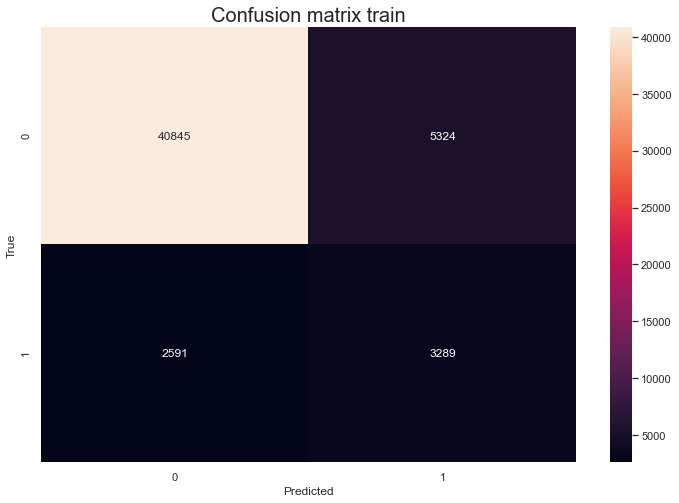

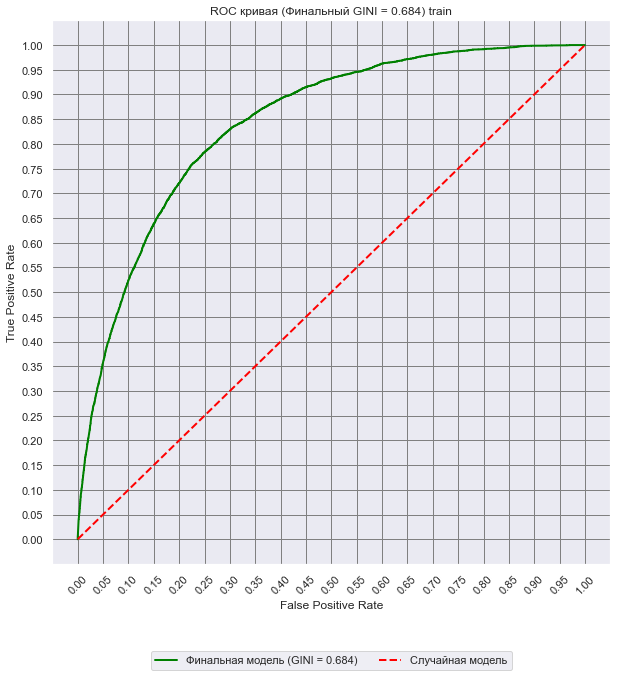

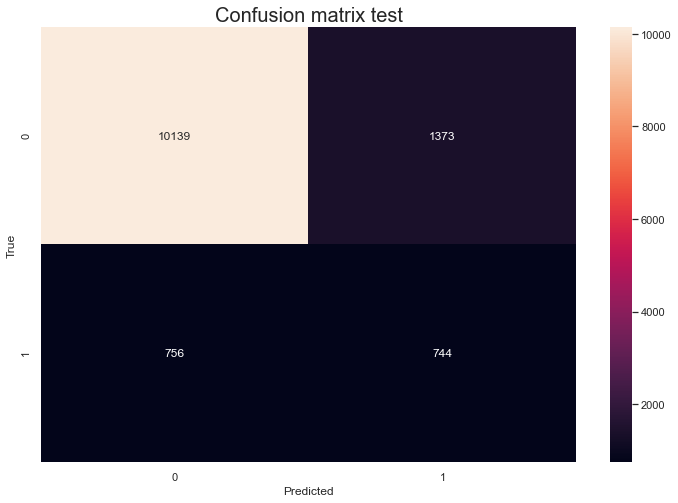

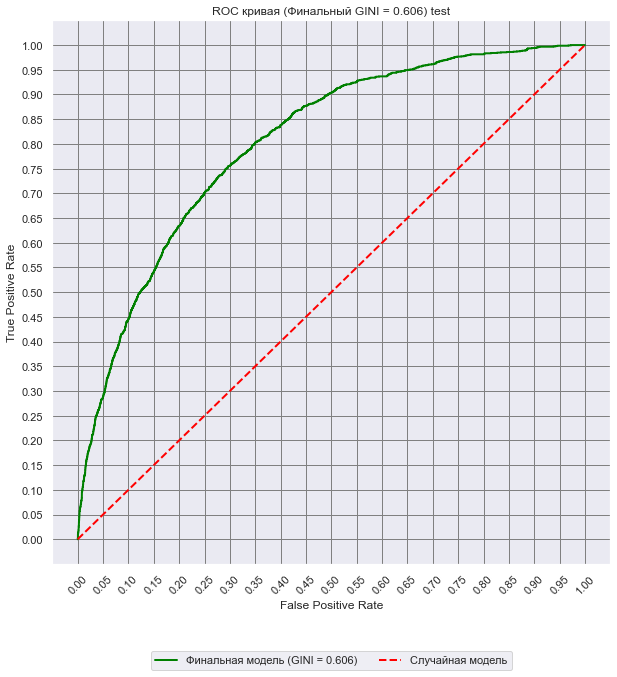

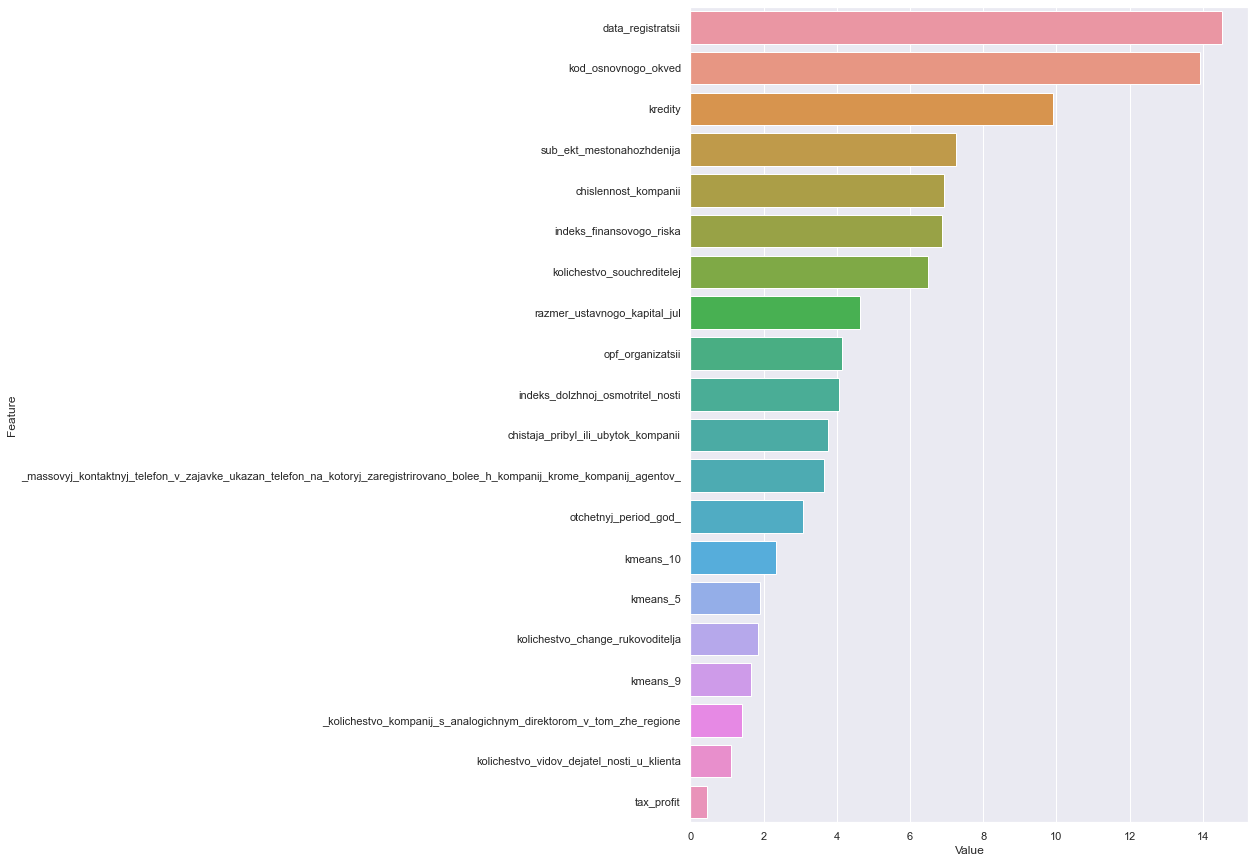

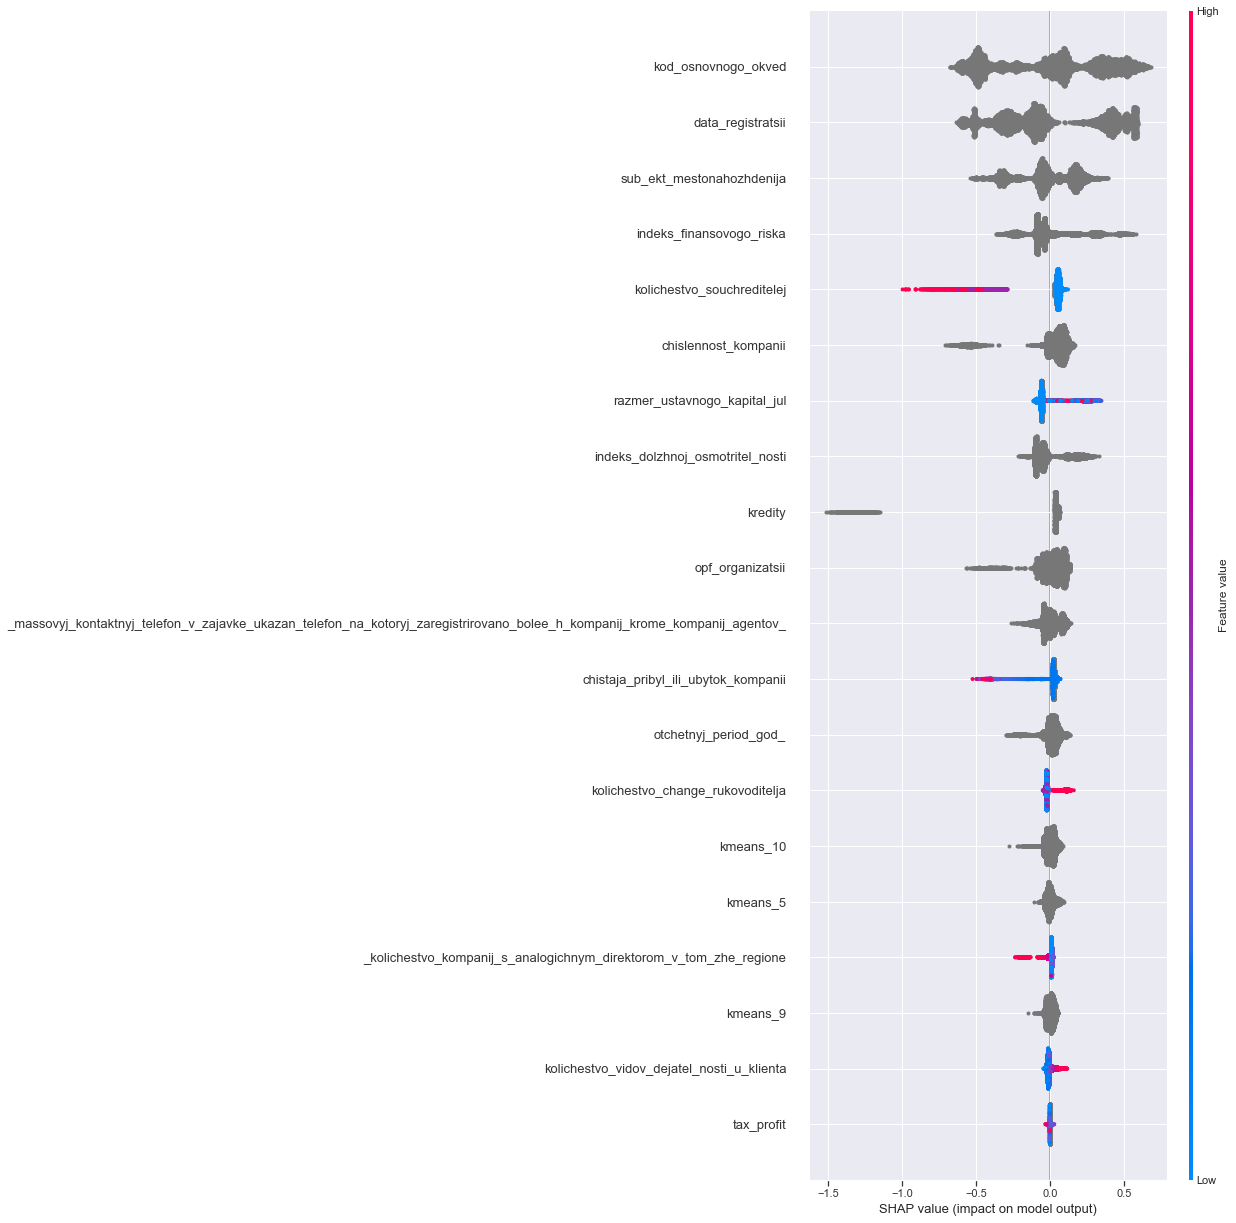

CPU times: user 40.5 s, sys: 558 ms, total: 41.1 s
Wall time: 16 s


In [46]:
%%time

# Расчитываем метрики для всех множеств, отрисовываем матрицы ошибок, графики метрики ROC AUC и важность признаков
# Recall расчитывается на k% (в текущей разработке 30%)

answer_train = pd.DataFrame()
answer_test = pd.DataFrame()

answer_train['TRUE'] = y_train
answer_train['PREDICTED'] = pred_train_b

answer_test['TRUE'] = y_test
answer_test['PREDICTED'] = pred_test_b

show_metrics(answer_train, answer_test, ctb_cv_b.model, X_test_b, 0.3)

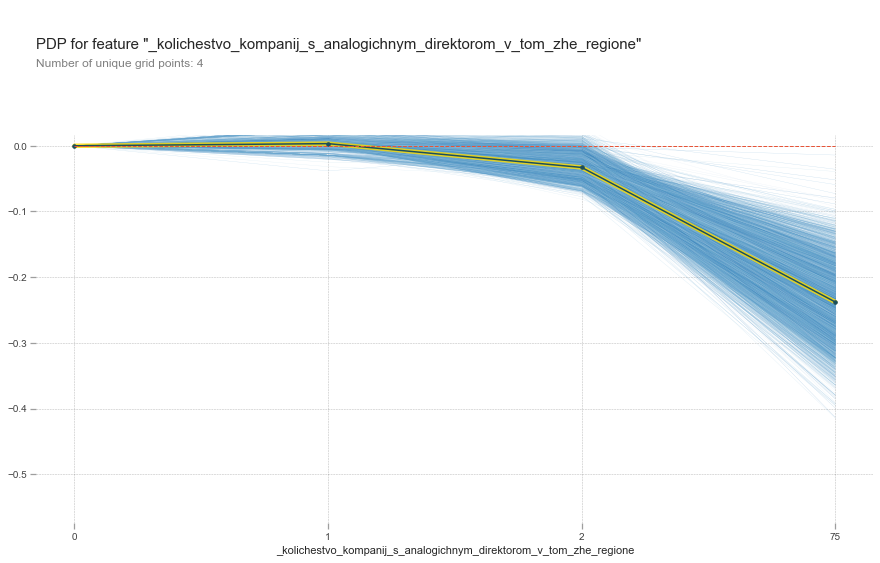

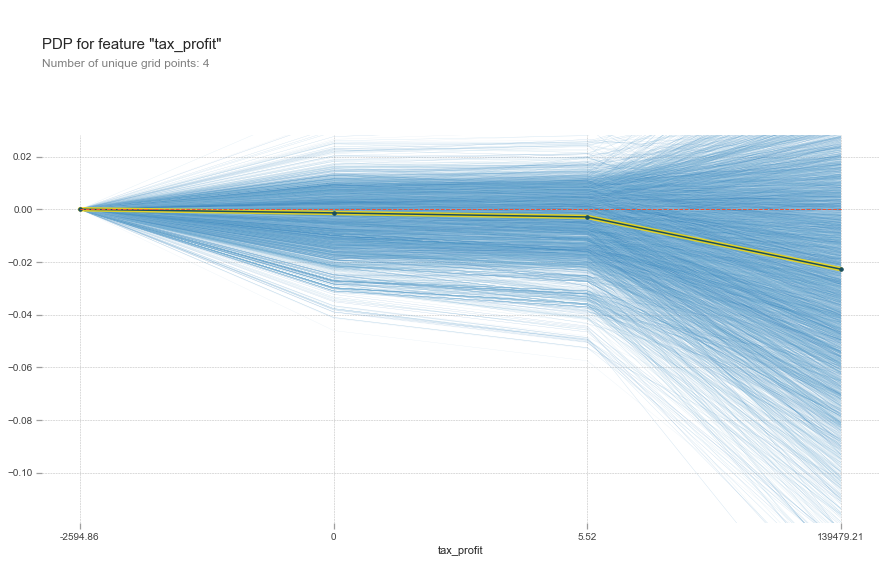

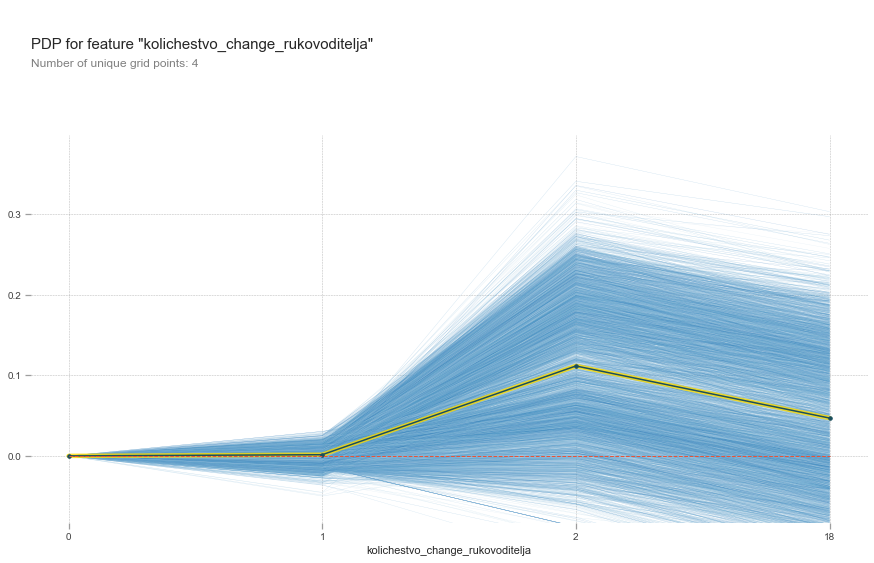

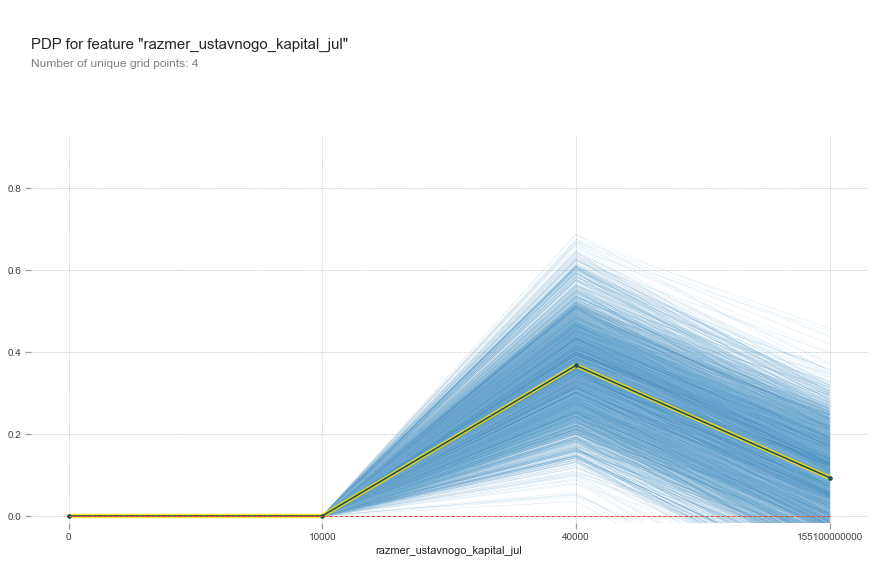

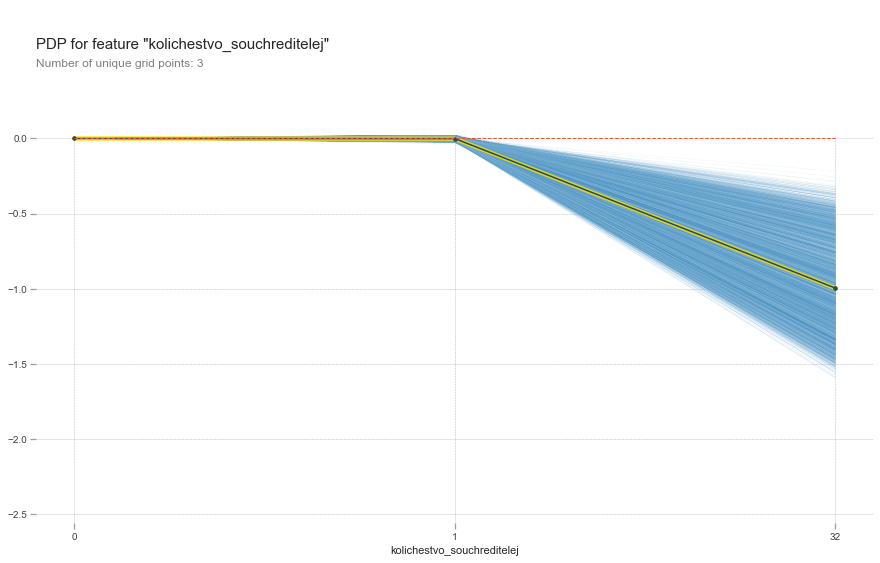

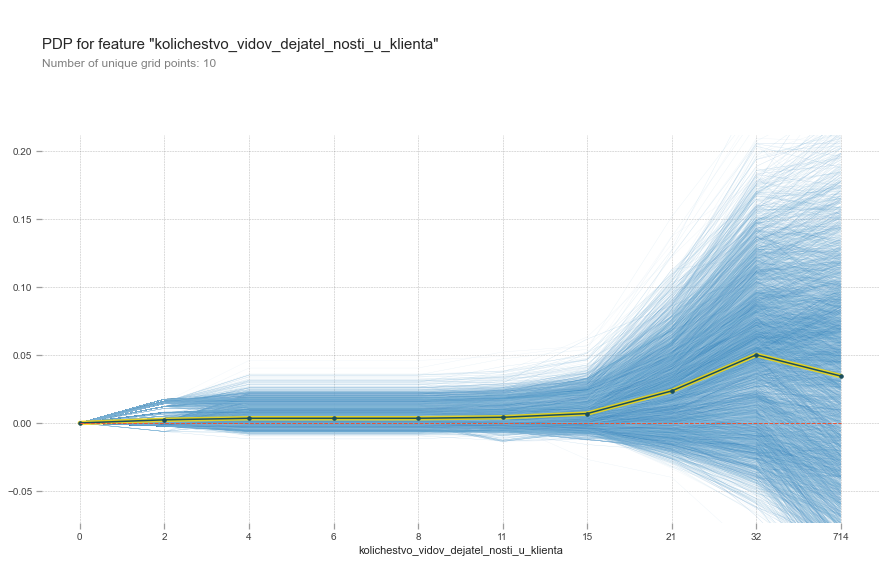

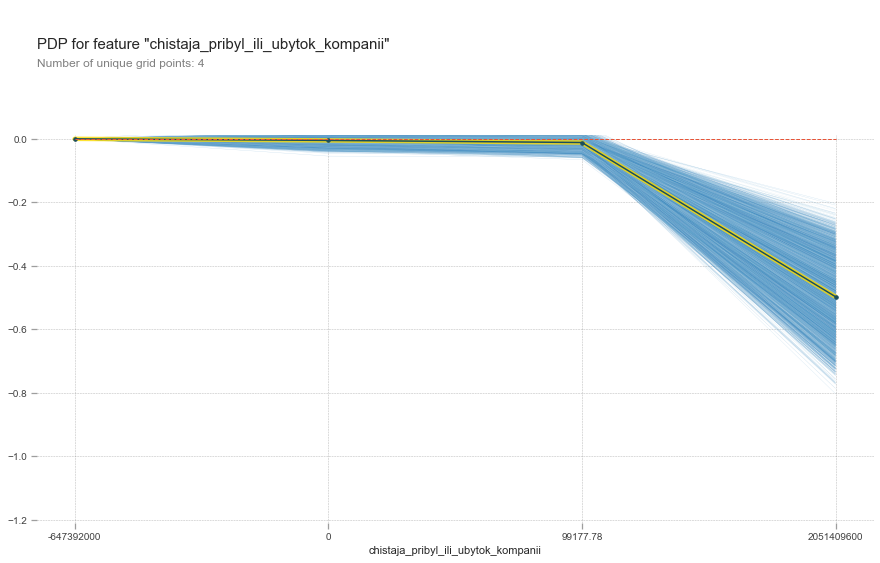

In [47]:
# Отрисуем PDP-ICE для количественных признаков
# Позволяет установить зависимости между предсказаниями модели и фактором
# Не работает с пропусками, необходимо заполнять их для построения графиков

X_to_pdp = X_train_b
cont_col_alt = list(set(b_features)-set(b_cat))
X_to_pdp[cont_col_alt] = X_to_pdp[cont_col_alt].fillna(0)

for feat in cont_col_alt:
    plot_pdp(ctb_cv_b,X_to_pdp, y_train, feat, frac_to_plot=5000)

In [48]:
# Проверка модели на переобучение. Относительная разница между трейном и тестом

overfitting(y_train,pred_train_b,y_test,pred_test_b,calc_metric,name_metric)

,Обучение ROC AUC,Тест ROC AUC,"Относительная разница, %"
Значение,0.84,0.8,-4.76


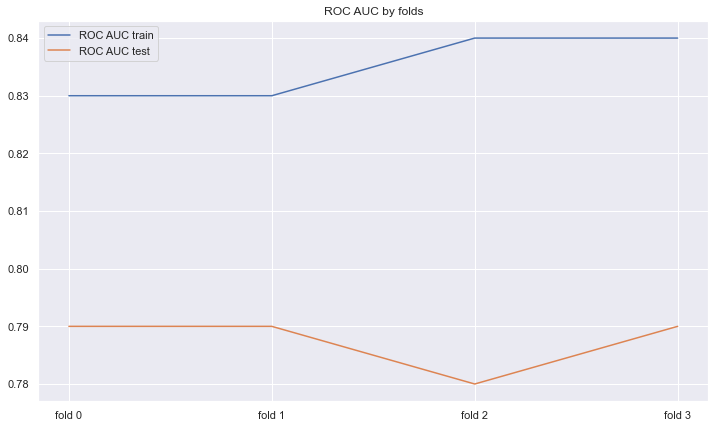

None


,Кросс-валидация (обучение) <FUNCTION AUC_CTB AT 0X7FC3B0412440>,Кросс-валидация (тест) <FUNCTION AUC_CTB AT 0X7FC3B0412440>,"Относительная разница, %"
fold 0,0.83,0.79,-5.06
fold 1,0.83,0.79,-5.06
fold 2,0.84,0.78,-7.69
fold 3,0.84,0.79,-6.33


In [49]:
# Проверка стабильности и переобучения при кросс-валидационной схеме обучения

print(overfitting_folds_plot(ctb_cv_b,name_metric))
ctb_cv_b.scores_diff

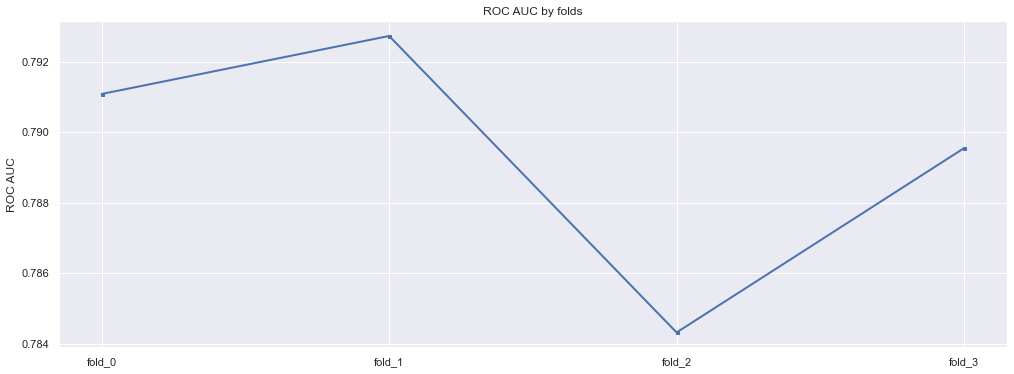

In [50]:
# Значение метрики по фолдам обучения 

plot_dynamic(model=ctb_cv_b,name_metric=name_metric)

In [51]:
# Добавим скоры для отрисовки динамики по месяцам

df_train['score_ctb_backward'] = pred_train_b
df_test['score_ctb_backward'] = pred_test_b

df_dynamic = df_train.append(df_test)[['data_otkrytija','target','score_ctb_backward']]
df_dynamic['months'] = pd.to_datetime(df_dynamic['data_otkrytija']).dt.strftime('%Y-%m')

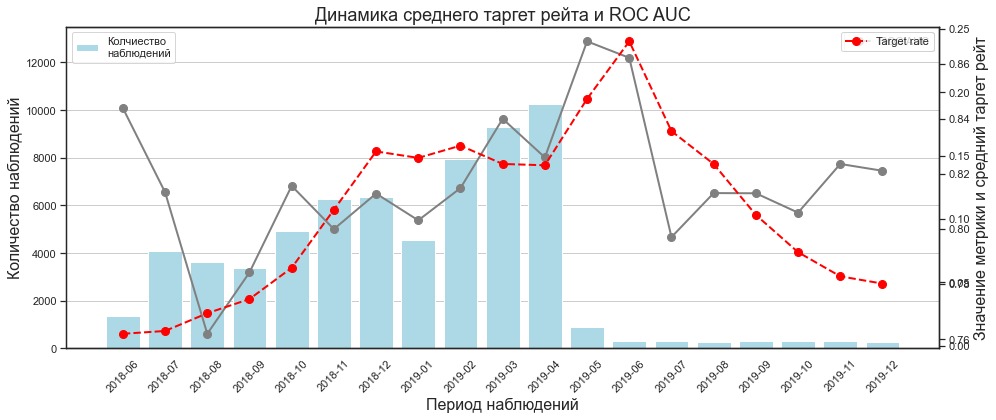

In [52]:
# Отрисовка среднего таргета и скора по месяцам

plot_dynamic_time(df_dynamic,calc_metric,name_metric,'data_otkrytija','months','target','score_ctb_backward')

In [53]:
# Проверка на качество более простых моделей

In [61]:
%%time

cv_fold = StratifiedGroupKFold(n_splits=4,shuffle=True,random_state=42).split(df_train,df_train.target,groups=df_train.inn)

simple_model(X_train_b,y_train,X_test_b,y_test,b_cat,metric=AUC_ctb,cv=cv_fold,decision='lr',param_search=True)

Лучшее значение метрики и параметров логистической регрессии:
nan {'lr_clf__penalty': 'l1', 'lr_clf__C': 0.5} 

Метрика качества на обучающем множестве логистической регрессии:
0.804
Метрика качества на тестовом множестве логистической регрессии:
0.78
CPU times: user 56.7 s, sys: 2.23 s, total: 58.9 s
Wall time: 1min 11s


In [68]:
# Калибровка результатов для получения вероятностей скорров, полученных после обучения CatBoost

from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression

iso_reg = IsotonicRegression(y_min = 0, y_max = 1, out_of_bounds = 'clip').fit(pred_train_b, y_train)
proba_test_isoreg = iso_reg.predict(pred_test_b)

log_reg = LogisticRegression().fit(pred_train_b.reshape(-1, 1), y_train)
proba_test_logreg = log_reg.predict_proba(pred_test_b.reshape(-1, 1))[:, 1]


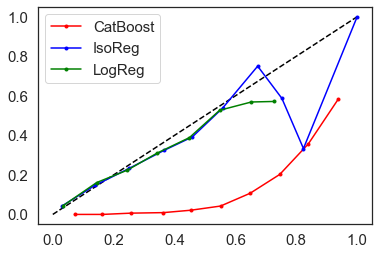

In [69]:
# Отрисовка калибровочных кривых для скорров CatBoost, изотонической и логистической регрессии

from sklearn.calibration import calibration_curve

fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, pred_test_b, n_bins=10, normalize=True)
fop_calibrated_isoreg, mpv_calibrated_isoreg = calibration_curve(y_test, proba_test_isoreg, n_bins=10)
fop_calibrated_logreg, mpv_calibrated_logreg = calibration_curve(y_test, proba_test_logreg, n_bins=10)

# Параметры отрисовки
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', color='red', label='CatBoost')
plt.plot(mpv_calibrated_isoreg, fop_calibrated_isoreg, marker='.', color='blue', label='IsoReg')
plt.plot(mpv_calibrated_logreg, fop_calibrated_logreg, marker='.', color='green', label='LogReg')
plt.legend()
plt.show()

In [70]:
# Ожидаемая ошибка калибровки на Python, с правилом Фридмана-Диакониса по умолчанию

def expected_calibration_error(y, proba, bins = 'fd'):
    bin_count, bin_edges = np.histogram(proba, bins = bins)
    n_bins = len(bin_count)
    bin_edges[0] -= 1e-8 # because left edge is not included
    bin_id = np.digitize(proba, bin_edges, right = True) - 1
    bin_ysum = np.bincount(bin_id, weights = y, minlength = n_bins)
    bin_probasum = np.bincount(bin_id, weights = proba, minlength = n_bins)
    bin_ymean = np.divide(bin_ysum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
    bin_probamean = np.divide(bin_probasum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
    ece = np.abs((bin_probamean - bin_ymean) * bin_count).sum() / len(proba)
    
    return ece

In [72]:
print('ece Catboost: ', expected_calibration_error(y_test,pred_test_b))
print('ece IsoReg: ', expected_calibration_error(y_test,proba_test_isoreg))
print('ece LogReg: ', expected_calibration_error(y_test,proba_test_logreg))

ece Catboost:  0.9478269799336378
ece IsoReg:  0.0196317098573569
ece LogReg:  0.020171615494182574


In [73]:
# Сохранение модели калибровки

pickle.dump(iso_reg, open('calib_model.pkl', "wb"))